In [ ]:
import glob
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Get the path to the normal and pneumonia sub-directories
data_dir=Path('/content/drive/My Drive/pneumonia/')

all_data=[]

for path in ['normal', 'virus', 'bacteria']:
    class_path = data_dir / path
    for img in class_path.glob('*'):
        img_path=class_path / img
        all_data.append((str(img_path), path))

all_data_df = pd.DataFrame(all_data, columns=['image', 'class'],index=None)

# Shuffle the data
all_data_df = all_data_df.sample(frac=1.).reset_index(drop=True)

# How the dataframe looks like?
all_data_df.head()

,image,class
0,/content/drive/My Drive/pneumonia/virus/person...,virus
1,/content/drive/My Drive/pneumonia/virus/person...,virus
2,/content/drive/My Drive/pneumonia/bacteria/per...,bacteria
3,/content/drive/My Drive/pneumonia/bacteria/per...,bacteria
4,/content/drive/My Drive/pneumonia/bacteria/per...,bacteria


## EDA

### Data Summary

In [ ]:
virus_data=all_data_df[all_data_df['class']=='virus']
bacteria_data=all_data_df[all_data_df['class']=='bacteria']
normal_data=all_data_df[all_data_df['class']=='normal']

print(f"Virus Set has: {len(virus_data)} images")
print(f"Bacteria Set has: {len(bacteria_data)} images")
print(f"Normal Set has: {len(normal_data)} images")

Virus Set has: 1490 images
Bacteria Set has: 2769 images
Normal Set has: 1583 images


### Class Distribution

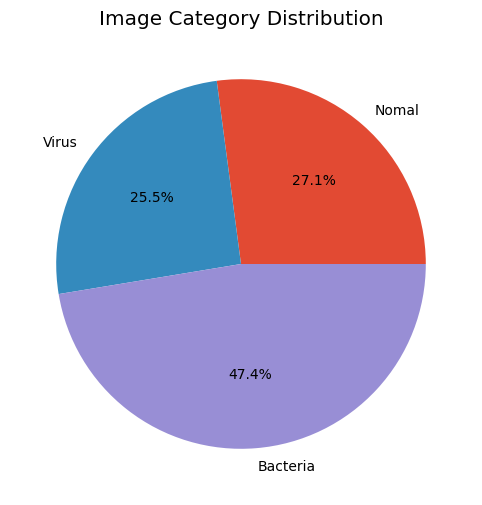

In [ ]:
labels = ['Nomal', 'Virus', 'Bacteria']
targets = [len(normal_data), len(virus_data), len(bacteria_data)]

plt.style.use("ggplot")
plt.figure(figsize=(10, 6))
plt.pie(x=targets, labels=labels, autopct="%1.1f%%")
plt.title("Image Category Distribution")
plt.show()

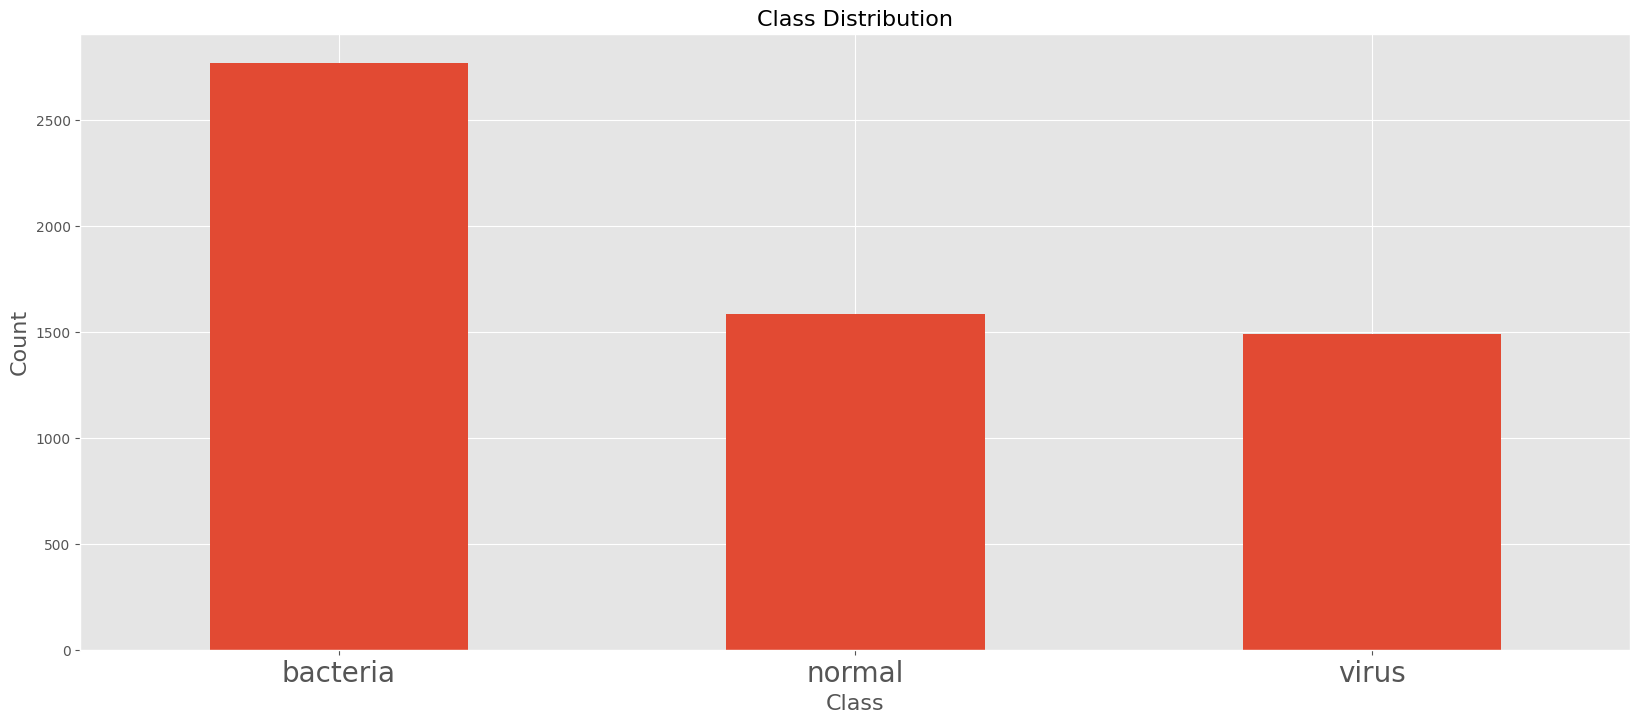

In [ ]:
# plot class distribution
plt.figure(figsize=(20,8))
all_data_df['class'].value_counts().plot(kind='bar')
plt.title('Class Distribution', fontsize=16)
plt.xlabel('Class', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=0, fontsize=20)
plt.show()

### Basic X-Ray Images

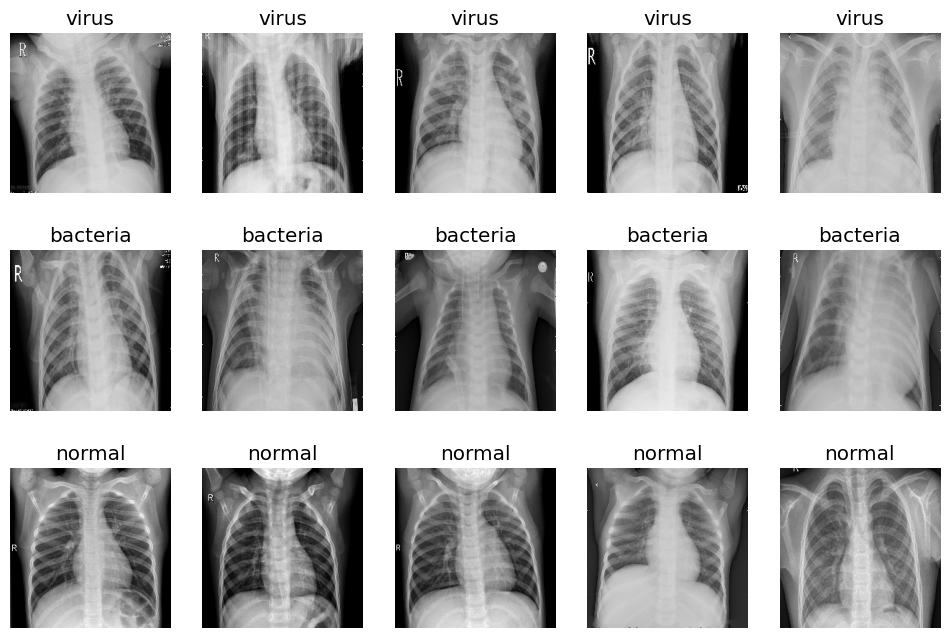

In [ ]:
dataframes = [virus_data, bacteria_data, normal_data]
class_labels = ['virus', 'bacteria', 'normal']

fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(12, 8))
for i, df in enumerate(dataframes):
    for j in range(5):
        img_path = df.iloc[j, 0]
        img = image.load_img(img_path, target_size=(224, 224))
        axs[i, j].imshow(img)
        axs[i, j].set_title(class_labels[i])
        axs[i, j].axis('off')

plt.show()

### Abnomal Object Images

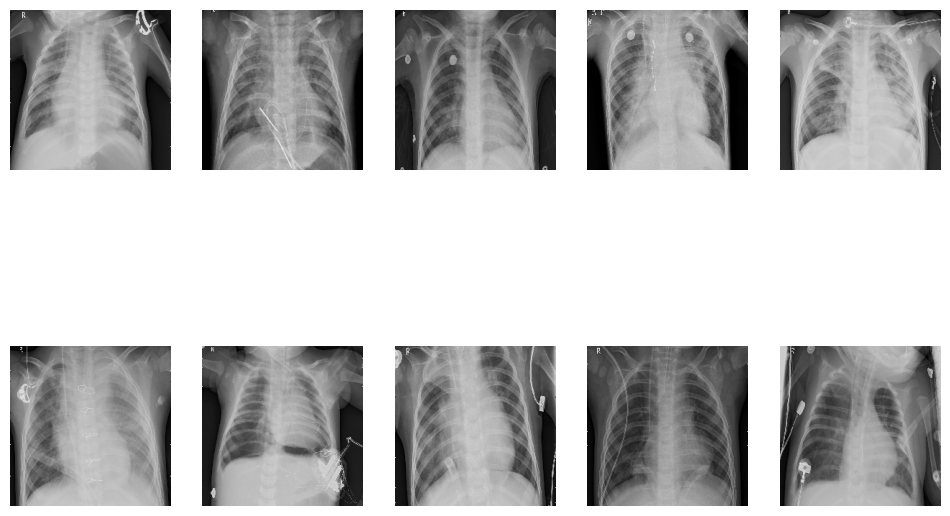

In [ ]:
object_example=[data_dir/'bacteria/person301_bacteria_1427.jpeg', 
                data_dir/'bacteria/person321_bacteria_1489.jpeg',
                data_dir/'virus/person11_virus_38.jpeg',
                data_dir/'virus/person124_virus_233.jpeg',
                data_dir/'virus/person298_virus_617.jpeg',
                data_dir/'bacteria/person3_bacteria_11.jpeg',
                data_dir/'bacteria/person23_bacteria_80.jpeg',
                data_dir/'bacteria/person25_bacteria_114.jpeg',
                data_dir/'bacteria/person37_bacteria_186.jpeg',
                data_dir/'bacteria/person63_bacteria_306.jpeg']
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(12, 8))
for i in range(2):
    for j in range(5):
        k = i*5 + j
        if k < len(object_example):
            img_path = object_example[k]
            img = image.load_img(img_path, target_size=(224, 224))
            axs[i,j].imshow(img)
        axs[i,j].axis('off')
plt.show()